**IMPORT:**

In [40]:
import pandas as pd
import numpy as np
import sklearn

!pip install xgboost
import xgboost as xg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**EDA:**

In [29]:
df=pd.read_csv("/content/bank-additional-full.csv", sep=";")

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**LABEL ENCODING:**

In [47]:
from sklearn import preprocessing

objcol=df.columns[df.dtypes == 'object']
encoder= preprocessing.LabelEncoder()
for col in objcol:
  df[col]=encoder.fit_transform(df[col])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**SPLIT: Train, Test**

In [61]:
features=df.columns[:20]
#print(features)

x=df.loc[:,features]
y=df.loc[:,['y']]

print(x.shape,y.shape)

(41188, 20) (41188, 1)


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

**TRAIN:**

In [69]:
eval_set=[(x_train,y_train),(x_test,y_test)]
eval_metric=["auc","error"]

In [70]:
xgb1=xg.XGBClassifier()
xgb1.fit(x_train,y_train.values.ravel(), eval_metric=eval_metric,eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.902403	validation_0-error:0.091381	validation_1-auc:0.901931	validation_1-error:0.091042


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-auc:0.902707	validation_0-error:0.091259	validation_1-auc:0.902027	validation_1-error:0.091284
[2]	validation_0-auc:0.905674	validation_0-error:0.089742	validation_1-auc:0.904704	validation_1-error:0.090435
[3]	validation_0-auc:0.90592	validation_0-error:0.087921	validation_1-auc:0.904902	validation_1-error:0.08825
[4]	validation_0-auc:0.913654	validation_0-error:0.087921	validation_1-auc:0.912067	validation_1-error:0.08825
[5]	validation_0-auc:0.918087	validation_0-error:0.087921	validation_1-auc:0.915319	validation_1-error:0.08825
[6]	validation_0-auc:0.922837	validation_0-error:0.087921	validation_1-auc:0.918441	validation_1-error:0.08825
[7]	validation_0-auc:0.924366	validation_0-error:0.087375	validation_1-auc:0.922467	validation_1-error:0.087764
[8]	validation_0-auc:0.924723	validation_0-error:0.087223	validation_1-auc:0.922483	validation_1-error:0.087764
[9]	validation_0-auc:0.925616	validation_0-error:0.087253	validation_1-auc:0.923416	validation_1-error:0.0877

XGBClassifier()

In [72]:
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

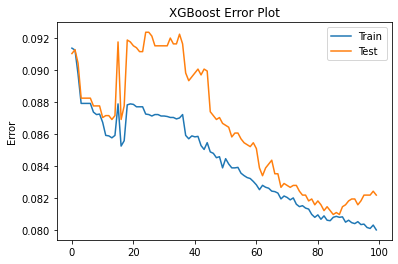

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error Plot')
plt.show()

**TEST:**

In [75]:
pred=xgb1.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))

0.9178198591891236
